<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### **Importing the dataset**

In [ ]:
df = pd.read_csv("marketing_campaign.csv", delimiter= '\t').drop_duplicates()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.iloc[:, :15].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15


In [ ]:
df.iloc[:, 15:].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### **Checking for NULL values**

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### **Handling NULL values**

In [ ]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df['Income'].isnull().sum()

np.int64(0)

### **Checking the Description of numeric columns for understanding the dataset distribution**

In [ ]:
df.iloc[:, :15].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52248.748825,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,11.984069,25039.981052,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [ ]:
df.iloc[:, 15:].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52248.748825,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25039.981052,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


### **Checking the Description of Categorical columns for understanding the dataset distribution**

In [ ]:
df.describe(include=['object'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### **Feature Engineering**

#### **Renaming the columns**

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.rename(columns={'ID': 'CustomerId',
    'Dt_Customer': 'EnrolledDate',
    'Recency': 'DaysSinceLastPurchase',

    'MntWines': 'AmountSpentOnWine',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeatProducts',
    'MntFishProducts': 'AmountSpentOnFishProducts',
    'MntSweetProducts': 'AmountSpentOnSweetProducts',
    'MntGoldProds': 'AmountSpentOnGoldProducts',

    'NumDealsPurchases': 'PurchasesMadeWithDiscounts',
    'NumWebPurchases': 'PurchasesMadeViaWeb',
    'NumCatalogPurchases': 'PurchasesMadeViaCatalog',
    'NumStorePurchases': 'PurchasesMadeDirectly',
    'NumWebVisitsMonth': 'NumberOfVisitsToWebsitePerMonth',

    'AcceptedCmp1': 'IsCampaign1Accepted',
    'AcceptedCmp2': 'IsCampaign2Accepted',
    'AcceptedCmp3': 'IsCampaign3Accepted',
    'AcceptedCmp4': 'IsCampaign4Accepted',
    'AcceptedCmp5': 'IsCampaign5Accepted',

    'Complain': 'HasComplainedInLast2Months',
    'Response': 'IsLastCampaignAccepted'}, inplace=True)

#### **Feature Transformation**

In [ ]:
df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate'], format='%d-%m-%Y')

#### **Feature Creation**

In [ ]:
df['Age'] = pd.Timestamp.today().date().year - df['Year_Birth']
df['TotalAmountSpent'] = df['AmountSpentOnWine'] + df['AmountSpentOnFruits'] + df['AmountSpentOnMeatProducts'] + df['AmountSpentOnFishProducts'] + df['AmountSpentOnSweetProducts'] + df['AmountSpentOnGoldProducts']
df['TotalPurchasesCount'] = df['PurchasesMadeViaWeb'] + df['PurchasesMadeViaCatalog'] + df['PurchasesMadeDirectly']

In [ ]:
df.iloc[:, -3:].head()

,Age,TotalAmountSpent,TotalPurchasesCount
0,68,1617,22
1,71,27,4
2,60,776,20
3,41,53,6
4,44,422,14


<Axes: ylabel='Frequency'>

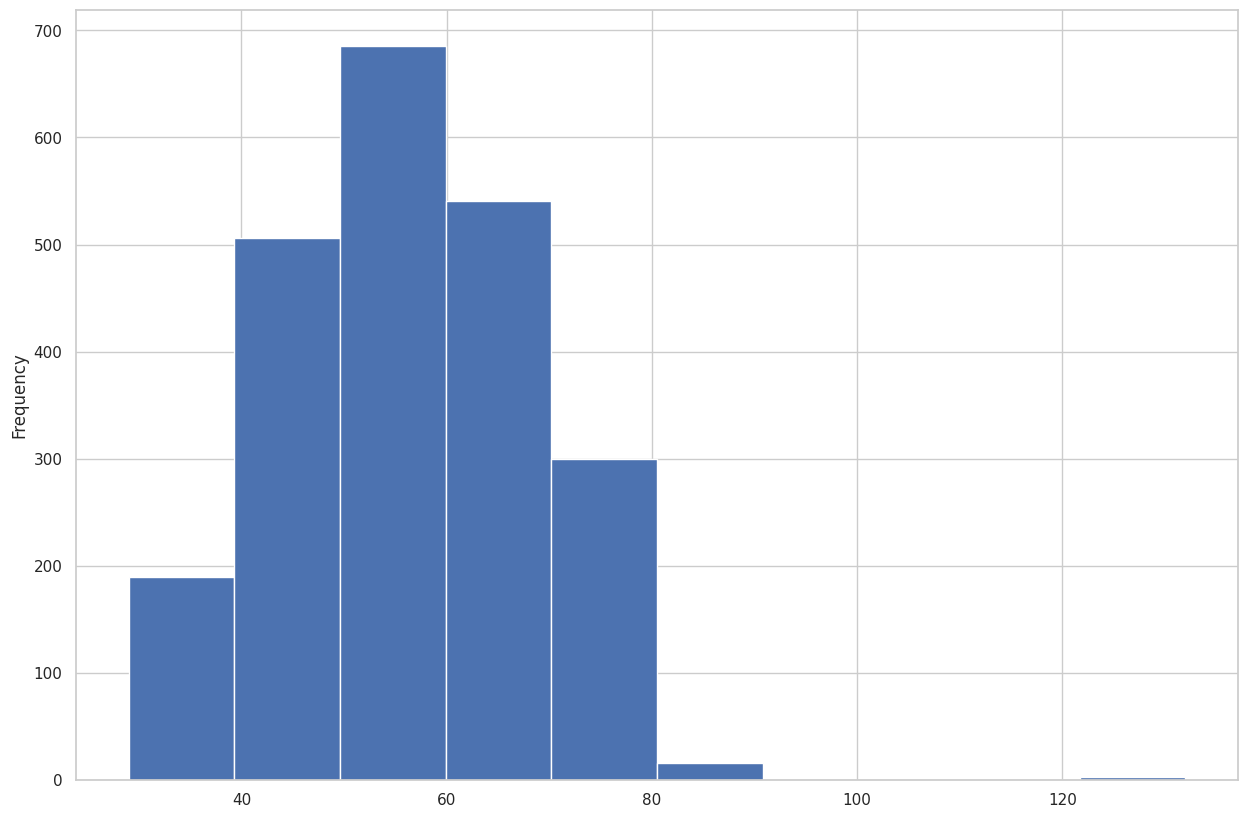

In [ ]:
plt.figure(figsize=(15, 10))
df['Age'].plot(kind='hist')

In [ ]:
df[df['Age'] > 100]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,Z_CostContact,Z_Revenue,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,125,65,5
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,132,22,3
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,126,1853,14


#### **Removing the outliers from Age column by considering only ages below 100**

In [ ]:
df = df[df['Age'] <= 100]

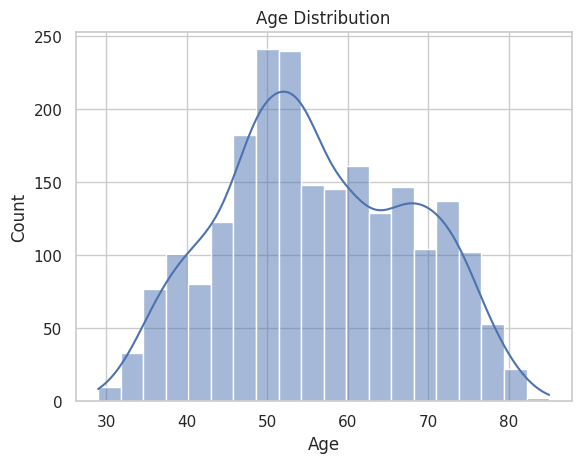

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

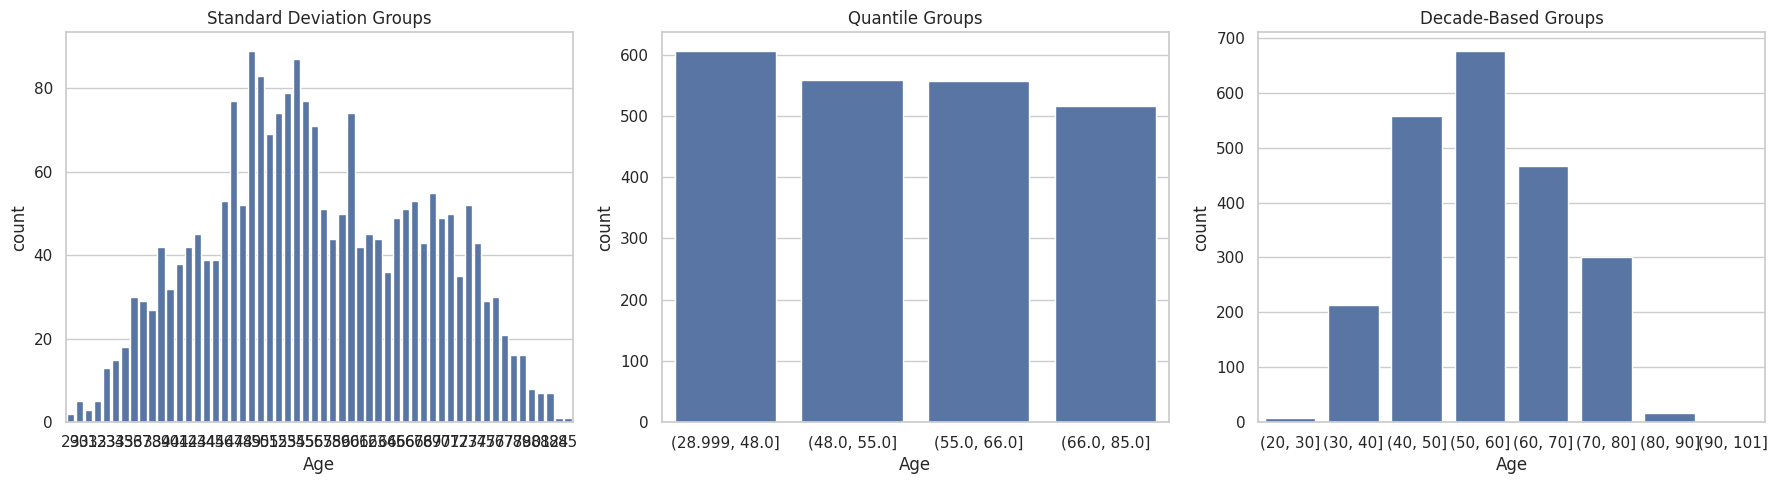

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Standard Deviation Groups')

sns.countplot(x=pd.qcut(df['Age'], q=4), ax=axes[1])
axes[1].set_title('Quantile Groups')

sns.countplot(x=pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 101]), ax=axes[2])
axes[2].set_title('Decade-Based Groups')

plt.tight_layout()
plt.show()

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 101]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='TotalAmountSpent', ylabel='TotalPurchasesCount'>

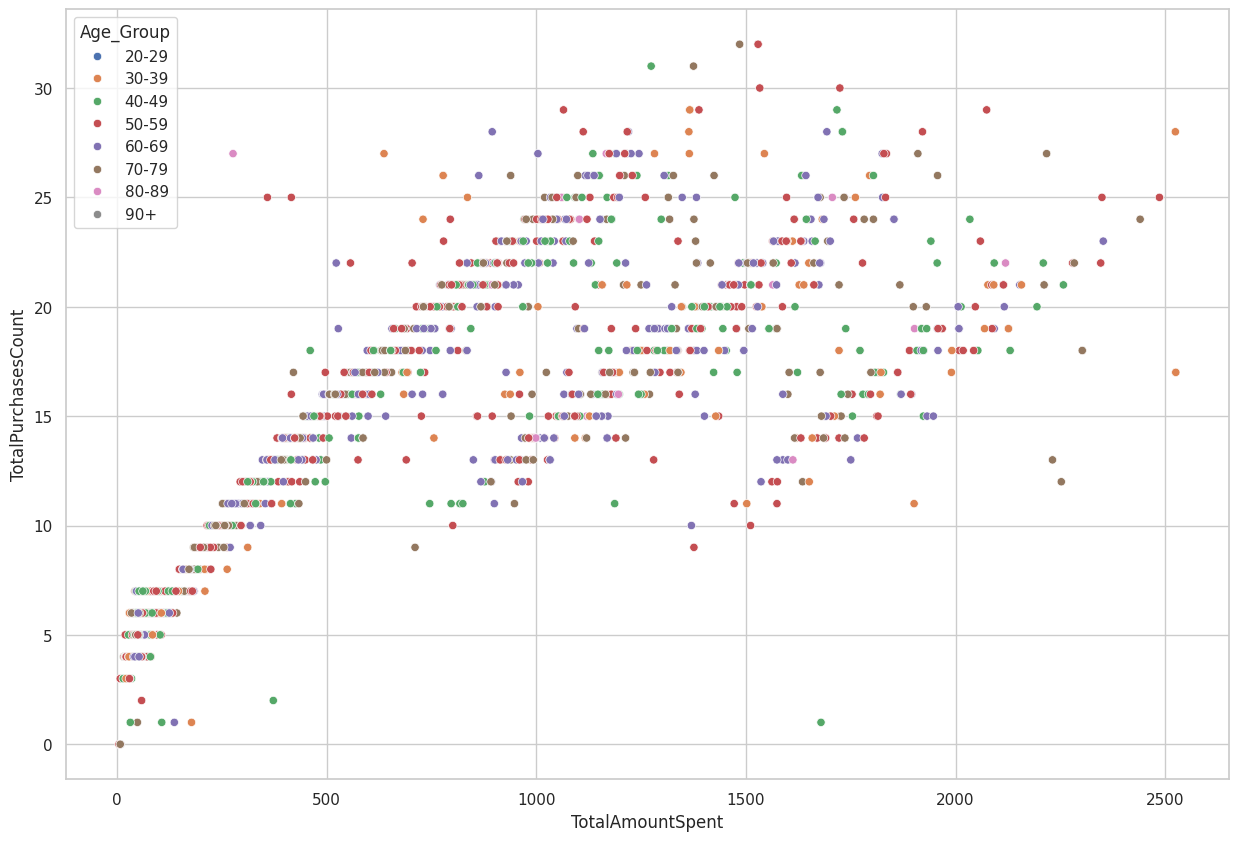

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='TotalPurchasesCount', data=df, hue='Age_Group')

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

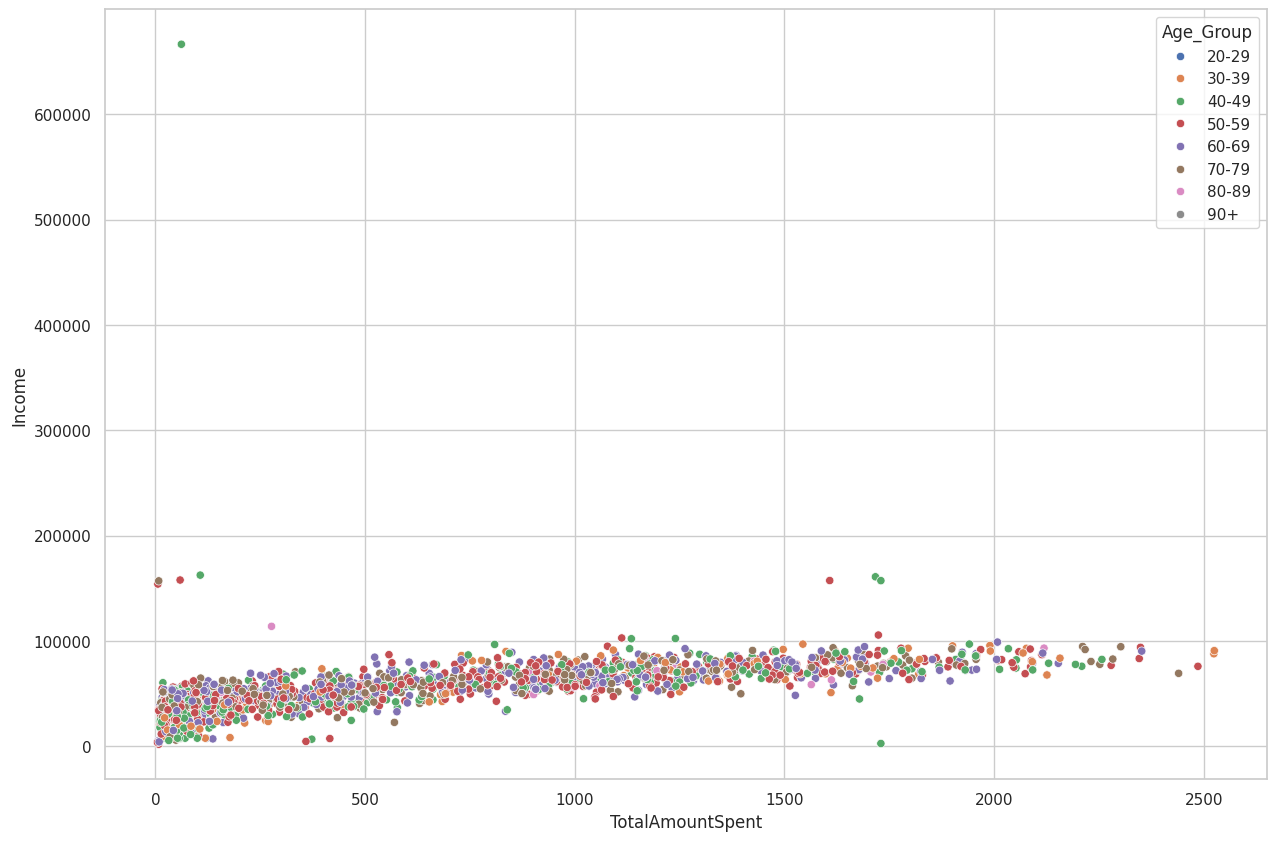

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

In [ ]:
df[df['Income'] > 300000]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,Z_CostContact,Z_Revenue,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,Age_Group
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,3,11,0,48,62,7,40-49


#### **Removing the outliers from Income column by considering only Income below 3,00,000 by taking reference of above plot**

In [ ]:
df = df[df['Income'] <= 300000]

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

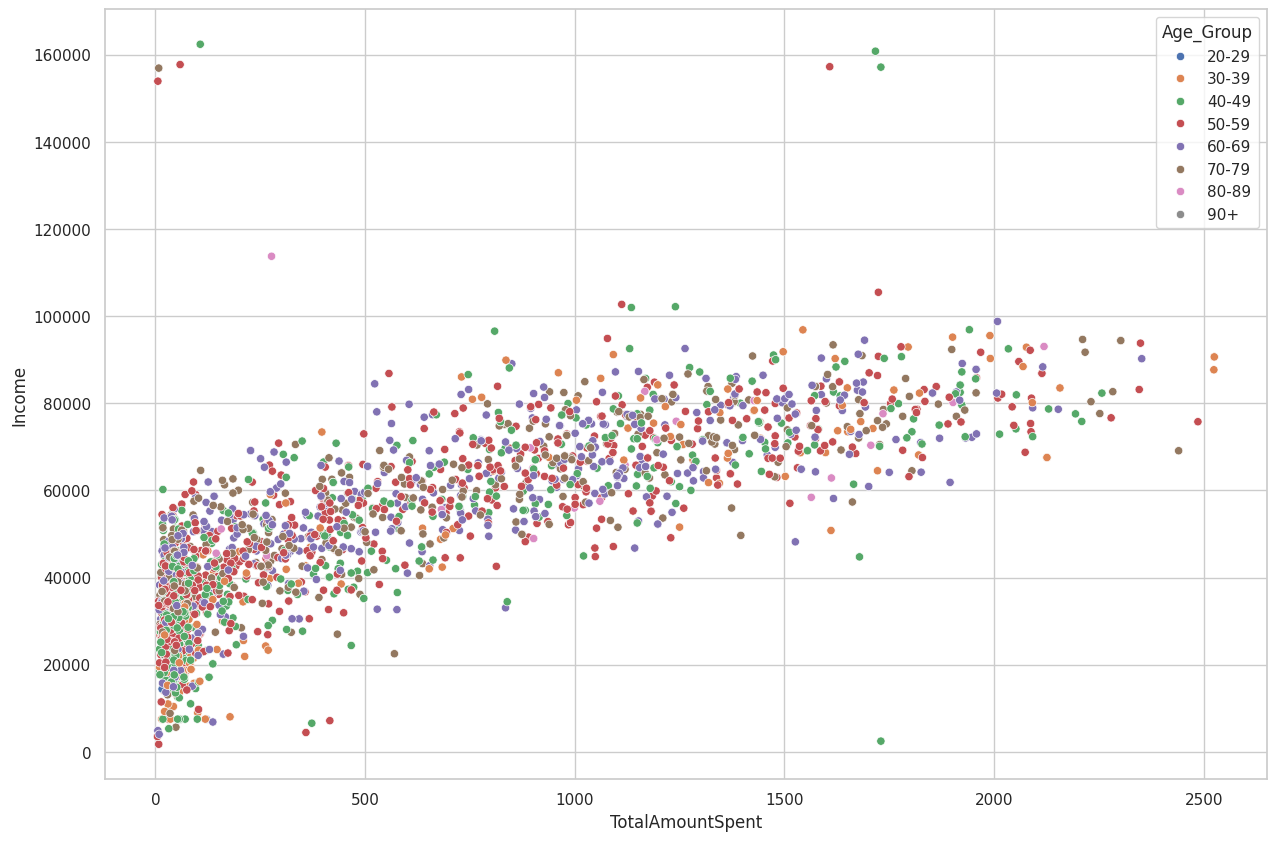

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

#### **Dropping Z_CostContact & Z_Revenue features as these features doesn't add any real value**

In [ ]:
df['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2236


In [ ]:
df['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2236


In [ ]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [ ]:
df.iloc[:, :15].head()

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15


In [ ]:
df.iloc[:, 15:].head()

,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,Age_Group
0,3,8,10,4,7,0,0,0,0,0,0,1,68,1617,22,60-69
1,2,1,1,2,5,0,0,0,0,0,0,0,71,27,4,70-79
2,1,8,2,10,4,0,0,0,0,0,0,0,60,776,20,60-69
3,2,2,0,4,6,0,0,0,0,0,0,0,41,53,6,40-49
4,5,5,3,6,5,0,0,0,0,0,0,0,44,422,14,40-49


#### **Creating the OfferAccepted column to know if the Customer has accepted the offer in any of the Campaigns**

In [ ]:
selected_columns = ['IsCampaign1Accepted', 'IsCampaign2Accepted', 'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted']
df['OfferAccepted'] = df[selected_columns].apply(lambda row: 1 if any(row) else 0, axis=1)

In [ ]:
sns.set(style="whitegrid")
groups = [['AmountSpentOnWine'], ['AmountSpentOnFruits'], ['AmountSpentOnMeatProducts'], ['AmountSpentOnFishProducts'], ['AmountSpentOnSweetProducts'], ['AmountSpentOnGoldProducts']]

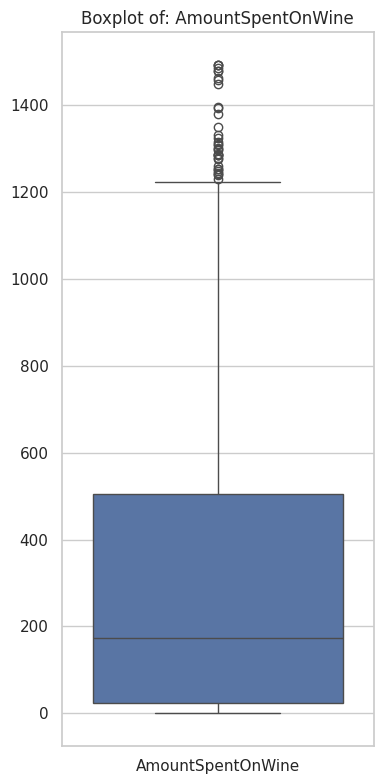

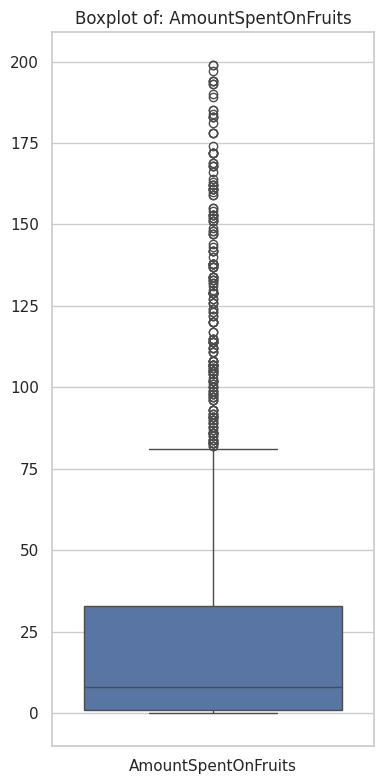

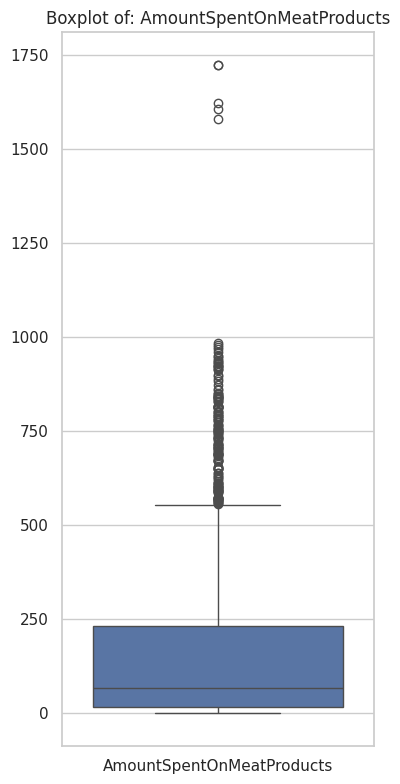

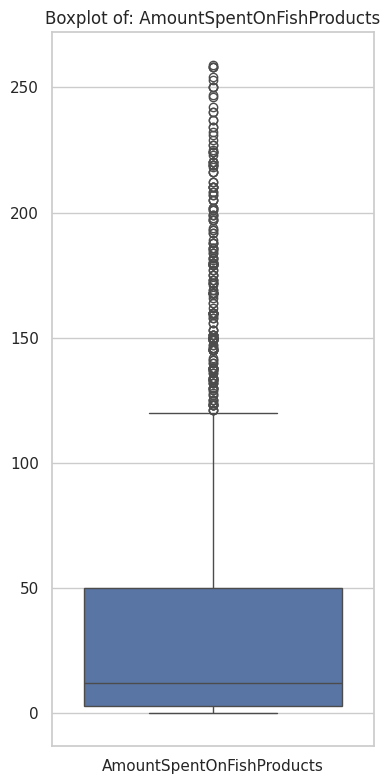

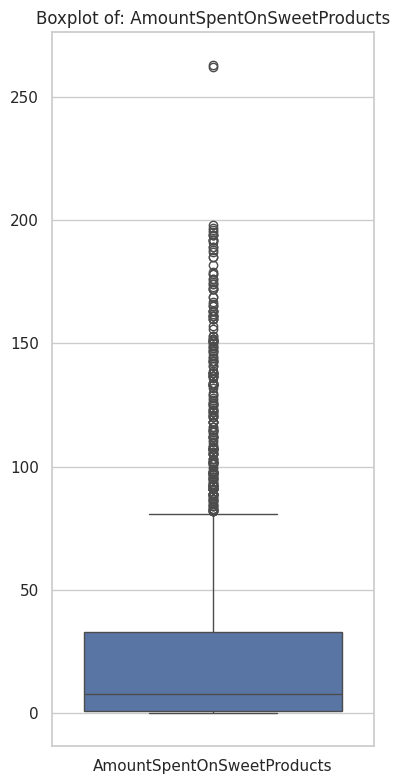

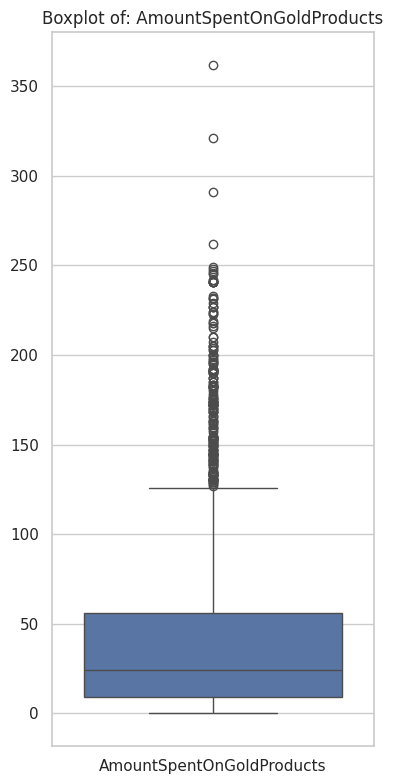

In [ ]:
for i, group in enumerate(groups, 1):
    plt.figure(figsize=(4, 8))
    sns.boxplot(data=df[group])
    plt.title(f"Boxplot of: {', '.join(group)}")
    plt.tight_layout()
    plt.show()

<Axes: ylabel='Frequency'>

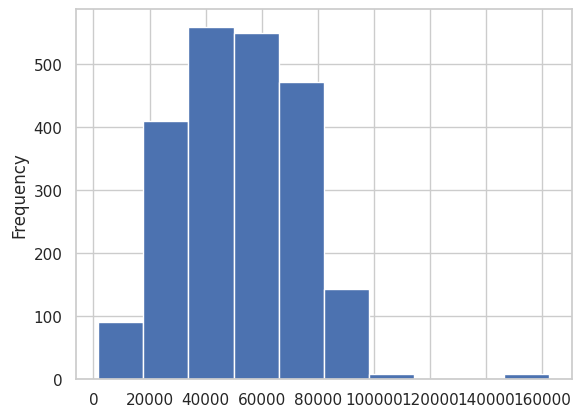

In [ ]:
plt.figsize=(20, 8)
df['Income'].plot(kind='hist')

In [ ]:
df['IncomeSegment'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])

In [ ]:
df.groupby('IncomeSegment')['Income'].agg(['min', 'mean', 'max']).astype(int)

,min,mean,max
IncomeSegment,,,
Low,1730,25278,35441
Lower-Mid,35523,43278,51369
Upper-Mid,51373,59922,68274
High,68281,79374,162397


In [ ]:
df.to_csv('Marketind Dataset all columns.csv', index=False)

## **Clustering**

In [ ]:
df.columns

Index(['CustomerId', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'EnrolledDate', 'DaysSinceLastPurchase',
       'AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts',
       'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts',
       'AmountSpentOnGoldProducts', 'PurchasesMadeWithDiscounts',
       'PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog',
       'PurchasesMadeDirectly', 'NumberOfVisitsToWebsitePerMonth',
       'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted',
       'IsCampaign1Accepted', 'IsCampaign2Accepted',
       'HasComplainedInLast2Months', 'IsLastCampaignAccepted', 'Age',
       'TotalAmountSpent', 'TotalPurchasesCount', 'Age_Group', 'OfferAccepted',
       'IncomeSegment'],
      dtype='object')

#### **Dropping all columns which doesn't add any value for further and created for understanding the dataset**

In [ ]:
df.drop(columns=['CustomerId'
                , 'EnrolledDate'
                , 'Year_Birth'
                , 'Age_Group'
                , 'TotalAmountSpent'
                , 'TotalPurchasesCount'
                , 'Age_Group'
                , 'OfferAccepted'
                , 'IncomeSegment'], inplace=True, axis=1)

In [ ]:
df.iloc[:, :15].head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3


In [ ]:
df.iloc[:, 15:].head()

,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age
0,4,7,0,0,0,0,0,0,1,68
1,2,5,0,0,0,0,0,0,0,71
2,10,4,0,0,0,0,0,0,0,60
3,4,6,0,0,0,0,0,0,0,41
4,6,5,0,0,0,0,0,0,0,44


### **Encoding Categorical Variables**

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1126
PhD,485
Master,370
2n Cycle,201
Basic,54


In [ ]:
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(education_order)

In [ ]:
df.drop(columns=['Education'], inplace=True, axis=1)

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,578
Single,479
Divorced,231
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
# Replace categories with 'Married' and 'Single' accordingly
df['Marital_Status'] = df['Marital_Status'].replace(
    {
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
    }
    )

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1442
Single,794


In [ ]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [ ]:
# Convert the boolean values in the 'Marital_Status' column to integers (0/1) for more consistantexplicitly makes the data more consistent, as many libraries or models expect numerical values
df['Marital_Status_Single'] = df['Marital_Status_Single'].astype(int)

In [ ]:
df.rename(columns={'Marital_Status_Single': 'IsSingle'}, inplace=True)

In [ ]:
df.iloc[:, :15].head()

,Income,Kidhome,Teenhome,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
df.iloc[:, 15:].head()

,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,IsSingle
0,0,0,0,0,0,0,1,68,1
1,0,0,0,0,0,0,0,71,1
2,0,0,0,0,0,0,0,60,0
3,0,0,0,0,0,0,0,41,0
4,0,0,0,0,0,0,0,44,0


In [ ]:
df.shape

(2236, 24)

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'DaysSinceLastPurchase',
       'AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts',
       'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts',
       'AmountSpentOnGoldProducts', 'PurchasesMadeWithDiscounts',
       'PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog',
       'PurchasesMadeDirectly', 'NumberOfVisitsToWebsitePerMonth',
       'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted',
       'IsCampaign1Accepted', 'IsCampaign2Accepted',
       'HasComplainedInLast2Months', 'IsLastCampaignAccepted', 'Age',
       'IsSingle'],
      dtype='object')

### **Feature Transformation: Scaling the features using StandardScaler**

In [ ]:
flag_cols = ['Kidhome'
            , 'Teenhome'
            , 'IsCampaign1Accepted'
            , 'IsCampaign2Accepted'
            , 'IsCampaign3Accepted'
            , 'IsCampaign4Accepted'
            , 'IsCampaign5Accepted'
            , 'IsLastCampaignAccepted'
            , 'HasComplainedInLast2Months'
            , 'IsSingle']
cols_to_scale = ['Income'
                , 'DaysSinceLastPurchase'
                , 'AmountSpentOnWine'
                ,	'AmountSpentOnFruits'
                ,	'AmountSpentOnMeatProducts'
                ,	'AmountSpentOnFishProducts'
                ,	'AmountSpentOnSweetProducts'
                , 'AmountSpentOnGoldProducts'
                , 'PurchasesMadeWithDiscounts'
                ,	'PurchasesMadeViaWeb'
                ,	'PurchasesMadeViaCatalog'
                ,	'PurchasesMadeDirectly'
                ,	'NumberOfVisitsToWebsitePerMonth'
                , 'Age']

In [ ]:
df['Id'] = range(1, len(df) + 1)

In [ ]:
flags_df = df[['Id'] + flag_cols].copy()
to_scale_df = df[['Id'] + cols_to_scale].copy()

In [ ]:
flags_df.head()

,Id,Kidhome,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,1,0,0,0,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0


In [ ]:
to_scale_df.head()

,Id,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,Age
0,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,68
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,71
2,3,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,60
3,4,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,41
4,5,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,44


In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(to_scale_df[cols_to_scale])

In [ ]:
scaled_df = pd.DataFrame(scaled_array, columns=cols_to_scale)

In [ ]:
scaled_df['Id'] = to_scale_df['Id']

In [ ]:
df_final = pd.merge(scaled_df, flags_df, on='Id')

In [ ]:
df_final.drop('Id', axis=1, inplace=True)

In [ ]:
df_final.iloc[:, :15].head()

,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,Age,Kidhome
0,0.288408,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.016868,0
1,-0.262476,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,1.273264,1
2,0.917811,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.333146,0
3,-1.182548,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-1.290693,1
4,0.295648,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-1.034298,1


In [ ]:
df_final.iloc[:, 15:].head()

,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.to_csv('Market Campaign Scaled Dataset for Clustering.csv', index=False)

<Axes: >

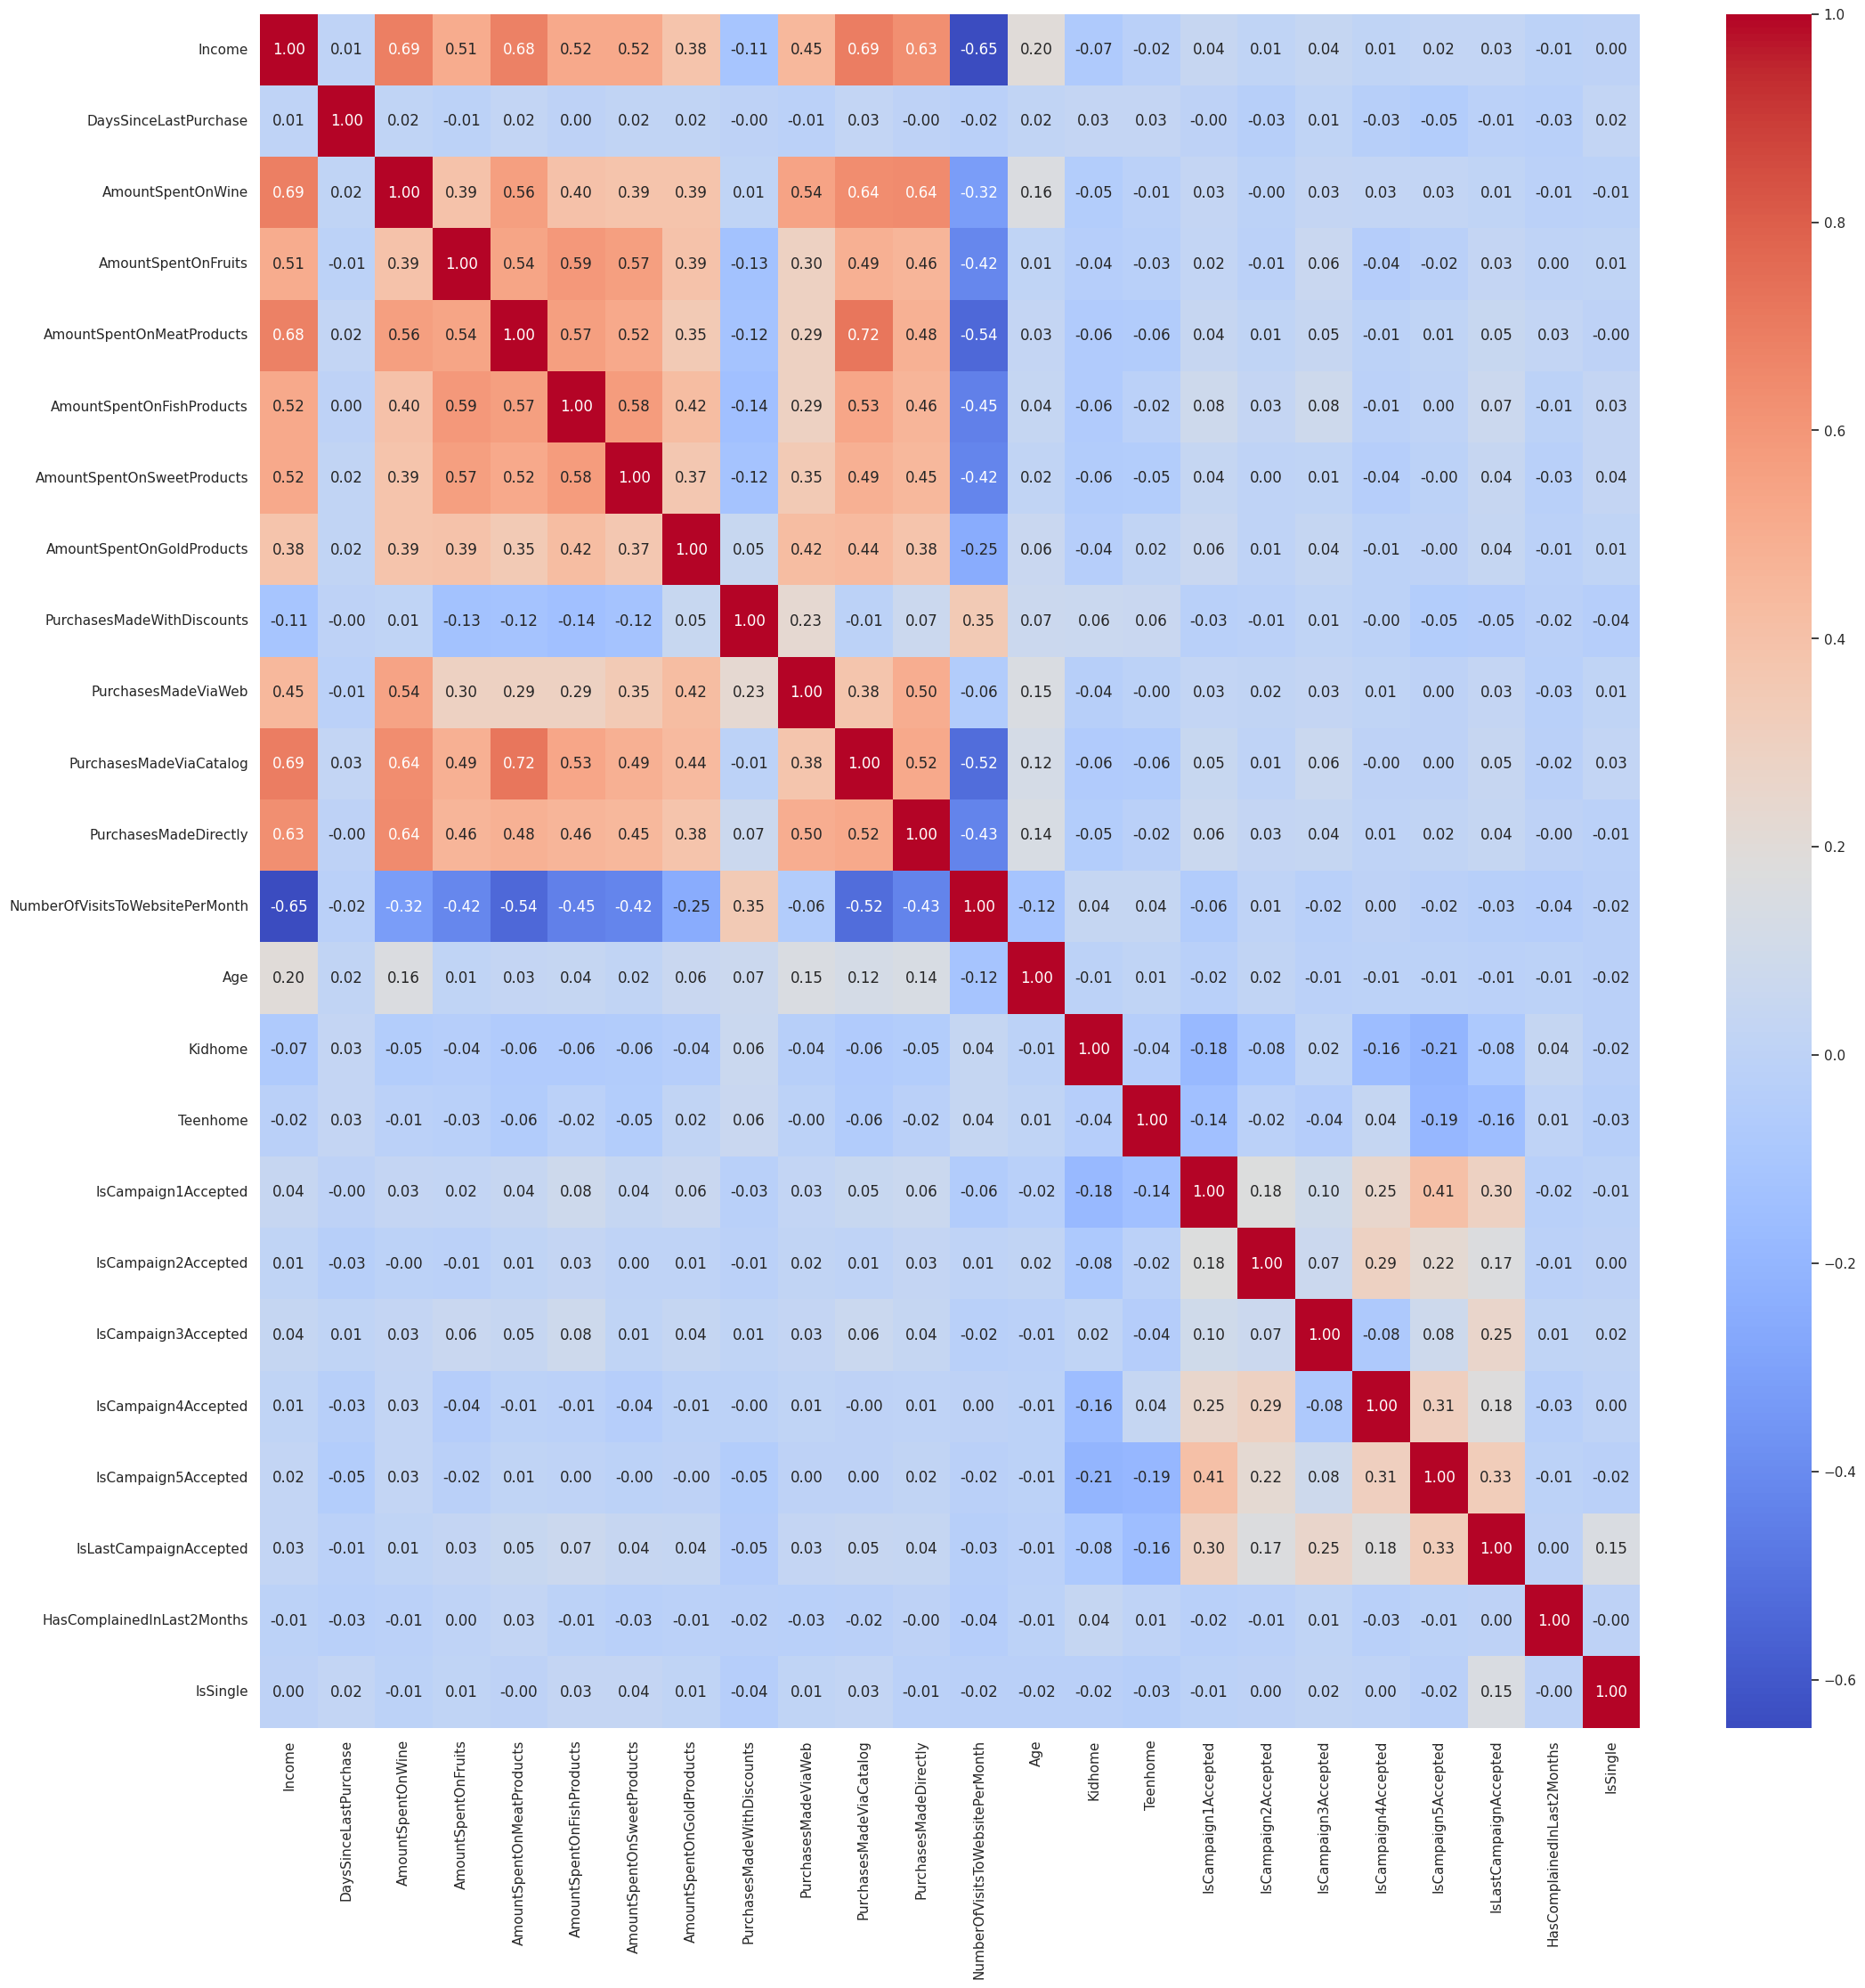

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Step 1: Create features that are good predictors of income
# df['Age'] = 2025 - df['Year_Birth']
# df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# # Step 2: Select relevant columns
# features = ['Age', 'Education', 'Marital_Status', 'TotalChildren', 'Recency']
# df_model = df[features + ['Income']].copy()

# # Step 3: Encode categorical features
# df_model = pd.get_dummies(df_model, columns=['Education', 'Marital_Status'], drop_first=True)

# # Step 4: Split known and missing
# train_data = df_model[df_model['Income'].notnull()]
# predict_data = df_model[df_model['Income'].isnull()]

# # Step 5: Train model
# X_train = train_data.drop('Income', axis=1)
# y_train = train_data['Income']
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 6: Predict missing values
# X_pred = predict_data.drop('Income', axis=1)
# predicted_income = model.predict(X_pred)

# # Step 7: Fill back the predictions
# df.loc[df['Income'].isnull(), 'Income'] = predicted_income